In [56]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

In [53]:
df = pd.read_csv('./bank-additional-full.csv', delimiter = ';')


In [54]:
df_dummies = pd.get_dummies(df)

del df_dummies['duration']
del df_dummies['y_no']

In [58]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators = 100)

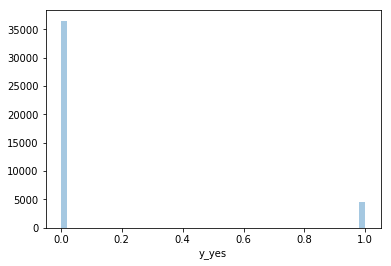

In [79]:
sns.distplot(df_dummies.y_yes, kde=False)

In [69]:
X = df_dummies[df_dummies.keys()[:-1]]
y = df_dummies['y_yes']

clf.fit(X.values, y.values)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [86]:
from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(n_splits=10)
score = cross_val_score(clf, X.values, y.values, cv=k_fold, n_jobs=-1)
print('Average accuracy: {} %'.format(np.mean(score)*100))

Average accuracy: 87.56103834668018 %


In [88]:
# from breast_cancer_dataset lab practice
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
print(indices)
# Print the feature ranking
print("Feature ranking:")

for f in range(len(X.keys())):
    print("%d. %s (%f)" % (f + 1, df_dummies.keys()[indices[f]],  importances[indices[f]]))

[ 0  1  7  2  8 61  4 36 38  6  9 22 28 31 56  5 58 55 18 23 57 39 54 41
  3 30 10 27 21 13 60 50 16 14 59 43 25 42 49 33 32 52 26 15 34 11 17 19
 48 12 44 47 53 51 45 20 37 40 46 24 29 35]
Feature ranking:
1. age (0.157193)
2. campaign (0.105474)
3. euribor3m (0.099224)
4. pdays (0.042178)
5. nr.employed (0.036069)
6. poutcome_success (0.025815)
7. emp.var.rate (0.024771)
8. housing_no (0.020806)
9. housing_yes (0.020413)
10. cons.conf.idx (0.019482)
11. job_admin. (0.017240)
12. marital_married (0.016105)
13. education_high.school (0.016049)
14. education_university.degree (0.015390)
15. day_of_week_thu (0.014988)
16. cons.price.idx (0.014791)
17. day_of_week_wed (0.014736)
18. day_of_week_mon (0.014621)
19. job_technician (0.014569)
20. marital_single (0.014418)
21. day_of_week_tue (0.014360)
22. loan_no (0.014146)
23. day_of_week_fri (0.013965)
24. loan_yes (0.013895)
25. previous (0.012619)
26. education_professional.course (0.011805)
27. job_blue-collar (0.011328)
28. education_b

In [89]:
# from breast_cancer_dataset lab practice
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "(%.2f)"%(cm[i, j])
        #print t
#         plt.text(j, i, t,
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


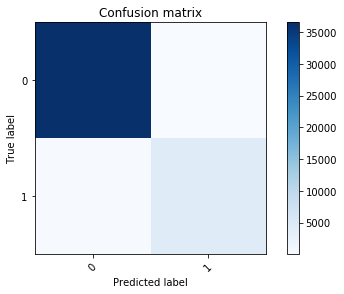

In [90]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X)
cnf_matrix = confusion_matrix(y, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(y))), normalize = False,
                      title='Confusion matrix')